In [3]:
import numpy as np


q = 9  
w = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36])  # Weights for velocity vectors
ξ = np.array([[0, 0], [1, 0], [0, 1], [-1, 0], [0, -1], [1, 1], [-1, 1], [-1, -1], [1, -1]])  # Velocity vectors

# Define the flow algorithm function
def flow_algorithm(ρ, N, ω, ω_tilde, nbFrames):
    velocity_field = np.zeros((nbFrames, ρ.shape[0], ρ.shape[1], 2))  # Initialize velocity field

    for t in range(nbFrames):
        for x in range(ρ.shape[0]):
            for y in range(ρ.shape[1]):
                f_s = np.zeros(q)  # Initialize distribution function

                for i in range(q):
                    f_s[i] = w[i] * ρ[x, y,t]  # Initialize probabilities

                for n in range(N):
                    for i in range(q):
                        ρ_xy_t = ρ[x, y,t]
                        v_n_xy_t = velocity_field[t, x, y]

                        f_eq = w[i] * ρ_xy_t  # Calculate equilibrium distribution
                        f_s[i] -= ω * (f_s[i] - f_eq - ξ[i].dot(v_n_xy_t))  # Collision step

                velocity_field[t, x, y] = calculate_velocity(f_s, ρ[x, y,t])  # Calculate velocity field

    return velocity_field

def calculate_velocity(f_s, ρ_xy):
    velocity = np.zeros(2)
    for i in range(q):
        velocity += ξ[i] * f_s[i]
    return velocity / ρ_xy

# Example usage
ρ = video_image  # Example spatio-temporal image
N = 5  # Number of correction cycles
ω = 0.1  # Relaxation frequency
ω_tilde = 0.1  # Correction rate
nbFrames = 2  # Number of frames in the video

velocity_field = flow_algorithm(ρ, N, ω, ω_tilde, nbFrames)

print(velocity_field.shape)


C:\Temp\nraisse2022\ipykernel_13592\3976905903.py:36: RuntimeWarning: invalid value encountered in divide
  return velocity / ρ_xy


(2, 48, 48, 2)


In [2]:
print()

In [140]:
import numpy as np

q = 9  
omega = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36])  # Weights for velocity vectors
epsilon = np.array([[0, 0], [1, 0], [0, 1], [-1, 0], [0, -1], [1, 1], [-1, 1], [-1, -1], [1, -1]])  # Velocity vectors

# Define the flow algorithm function
def flow_algorithm(rho, N, omega_fr, omega_tilde, nbFrames):
    velocity_field = np.zeros((nbFrames, rho.shape[1], rho.shape[2],2))  # Initialize velocity field
    f_s = np.zeros((q, rho.shape[1], rho.shape[2], nbFrames))  # Initialize distribution function
    rho_n = np.zeros((rho.shape[1], rho.shape[2],nbFrames ))
    for t in range(nbFrames-1):
        for x in range(1,rho.shape[1]):
            for y in range(rho.shape[2]):
                for i in range(q):
                    f_s[i,x,y,t] = omega[i] * rho[t,x,y]  # Initialize probabilities

        for n in range(N):
            for x in range(rho.shape[1]):
                for y in range(rho.shape[2]): 
                    for i in range(q):
                        rho_xy_t = rho[t,x, y]
                        v_n_xy_t = velocity_field[t, x, y]
                        f_eq = omega[i] * rho_xy_t * (1 + 3*np.dot(epsilon[i], v_n_xy_t + (9/2.0)*np.dot(epsilon[i], v_n_xy_t)**2-1.5*np.linalg.norm(v_n_xy_t)**2))  # Calculate equilibrium distribution
                        f_c = f_s[i,x,y,t] - omega_fr*(f_s[i,x,y,t]-f_eq) # Collision

                        new_x = x + epsilon[i][0]
                        new_y = y + epsilon[i][1]
                
                        # Vérifier que les indices restent dans les limites du tableau
                        if 0 <= new_x < rho.shape[1] and 0 <= new_y < rho.shape[2]:
                            f_s[i,new_x,new_y,t+1] = f_c  # Stream

            
                        
            for x in range(rho.shape[1]):
                for y in range(rho.shape[2]): 
                    rho_n[x,y,t+1] = 0
                    for i in range(q):                              
                        rho_n[x,y,t+1] += f_s[i,x,y,t+1] 
            for x in range(rho.shape[1]):
                for y in range(rho.shape[2]): 
                    for i in range(q):
                        new_x = x + epsilon[i][0]
                        new_y = y + epsilon[i][1]
                
                        # Vérifier que les indices restent dans les limites du tableau
                        if 0 <= new_x < rho.shape[1] and 0 <= new_y < rho.shape[2]:
                            f_s[i,x,y,t] = f_s[i,x,y,t]-omega_tilde*(rho_n[new_x,new_y,t+1]-rho[t+1,new_x,new_y]) # Correction
                    if rho[t,x, y]!=0:
                            velocity_field[t, x, y] = calculate_velocity(f_s[:,x,y,t], rho[t,x, y])  # Calculate velocity field
                    #np.where(rho[x, y, t]!=0,velocity_field[t, x, y],calculate_velocity(f_s[:,x,y,t], rho[x, y, t]))
                        

    return velocity_field

def calculate_velocity(f_s_xyt, rho_xy):
    velocity = np.zeros(2)
    for i in range(q):
        velocity += epsilon[i] * f_s_xyt[i]
    return velocity / rho_xy

# Example usage
video=video_image2.copy()
r=1
k=10
epsilon_GoDec=0.001
q=5
L,S=GoDec(video,r,k,epsilon_GoDec,q)
rho = video
#rho = video-L# Example spatio-temporal image
N = 5  # Number of correction cycles
omega_fr = 0.1  # Relaxation frequency
omega_tilde = 0.1  # Correction rate
nbFrames = rho.shape[0]  # Number of frames in the video (put 1 if you have 2 frames)

velocity_field = flow_algorithm(rho, N, omega_fr, omega_tilde, nbFrames)

print(velocity_field.shape)
print(velocity_field)


C:\Temp\nraisse2022\ipykernel_13592\3485959644.py:24: RuntimeWarning: overflow encountered in double_scalars
  f_eq = omega[i] * rho_xy_t * (1 + 3*np.dot(epsilon[i], v_n_xy_t + (9/2.0)*np.dot(epsilon[i], v_n_xy_t)**2-1.5*np.linalg.norm(v_n_xy_t)**2))  # Calculate equilibrium distribution
C:\Temp\nraisse2022\ipykernel_13592\3485959644.py:24: RuntimeWarning: invalid value encountered in subtract
  f_eq = omega[i] * rho_xy_t * (1 + 3*np.dot(epsilon[i], v_n_xy_t + (9/2.0)*np.dot(epsilon[i], v_n_xy_t)**2-1.5*np.linalg.norm(v_n_xy_t)**2))  # Calculate equilibrium distribution
C:\Temp\nraisse2022\ipykernel_13592\3485959644.py:40: RuntimeWarning: invalid value encountered in double_scalars
  rho_n[x,y,t+1] += f_s[i,x,y,t+1]


(51, 48, 48, 2)
[[[[ 7.46263020e-02  2.19698999e-01]
   [ 4.21861792e-02  1.56993805e-02]
   [ 4.33742811e-02  3.89508754e-02]
   ...
   [-1.22243628e-02 -4.21314495e-02]
   [ 3.70006495e-02  1.07312568e-01]
   [ 3.36180126e-02 -2.20459586e-01]]

  [[-2.26444129e-01  4.95229060e-02]
   [-2.03024413e-01 -1.91072222e-02]
   [-2.06458762e-01  2.34298579e-02]
   ...
   [-1.08312752e+00  3.04626072e-01]
   [-2.69185121e-01  5.69411840e-02]
   [-2.70456420e-01 -5.87657375e-02]]

  [[-7.14169900e-02  2.19402441e-02]
   [-4.80521568e-02 -1.69145653e-02]
   [-3.84658566e-02  2.03641558e-02]
   ...
   [ 1.97871373e-01  2.27984371e-01]
   [ 3.29688722e-02  9.07651812e-02]
   [ 1.35347837e-02 -1.92947482e-02]]

  ...

  [[-3.68867564e-04  2.52780094e-02]
   [-2.48670084e-03 -3.01489473e-02]
   [ 5.33315236e-03 -1.14970258e-02]
   ...
   [-1.08520705e-02 -1.47345965e-02]
   [-2.24432725e-02  2.43196830e-02]
   [ 1.01939728e-02 -3.27995993e-02]]

  [[ 4.03542034e-02  1.94887322e-02]
   [ 2.78706994e

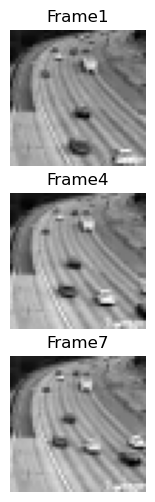

shape (51, 48, 48)


In [121]:
IMDIR="./demo.mp4"
video=cv2.VideoCapture(IMDIR)
if not video.isOpened():
    print("Error")
    exit()
frames=[]
while True:
    ret, frame = video.read()
    if not ret:
        break
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frames.append(gray_frame)
video.release()
video_image2=np.array(frames)
plt.figure(figsize=(10,6))
for i in range(1,10,3):
    plt.subplot(3,3,i)
    plt.imshow(cv2.cvtColor(video_image2[i],cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Frame{i}')
plt.show()

print("shape",video_image2.shape)

In [138]:
def GoDec(video,r,k,epsilon,q):
    f,x,y=video.shape
    X_reshaped=video.reshape(f,x*y)
    Lt=X_reshaped
    St=np.zeros((f,x*y))
    t=0
    while np.linalg.norm(X_reshaped-Lt-St)/np.linalg.norm(X_reshaped)>epsilon and t<1000:
        t += 1
        Ltilda = np.dot(np.linalg.matrix_power(np.dot((X_reshaped - St), (X_reshaped - St).T), q),(X_reshaped - St))
        Y1 = np.dot(Ltilda, X_reshaped - St)
        A1, A2 = qr(Y1, mode='economic')
        Y2 = np.dot(Ltilda.T, Y1)
        Q2, R2 = qr(Y2, mode='economic')
        Y1 = np.dot(Ltilda, Y2)
        Q1, R1 = qr(Y1, mode='economic')
        #if q == 0:
        #    Lt = np.dot(Y1, np.dot(pinv(np.dot(A2.T,Y1)), Y2.T))
        #else:
        if np.linalg.matrix_rank(np.dot(A2.T, Y1)) < r:
            r = np.linalg.matrix_rank(np.dot(A2.T, Y1))
            continue

            Lt = np.dot(Q1, np.dot(pinv(R1), R2.T))
            Lt = np.dot(Q1,np.dot(np.linlag.matrix_power(np.dot(R1,np.dot(pinv(np.dot(A2.T,Y1)),R2.T)),(1/(2*q+1)))
,Q2.T))
            
        indices = np.unravel_index(np.argsort(np.abs(X_reshaped - Lt).ravel())[:-k-1:-1], X_reshaped.shape)
        S[indices] = X_reshaped[indices]

    L = Lt.reshape((f,x,y))
    S = St.reshape((f,x,y))

    return L, S

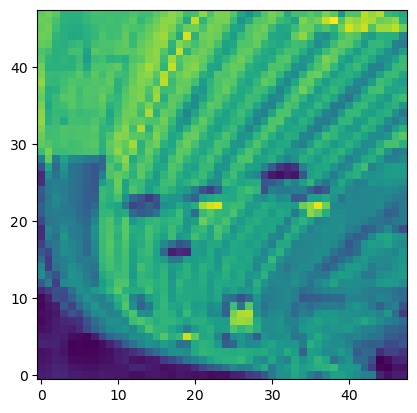

In [147]:
video=video_image2.copy()
r=1
k=10
epsilon=0.01
q=5
L,S=GoDec(video,r,k,epsilon,q)
plt.imshow(L[15, :, :], cmap='viridis', origin='lower')

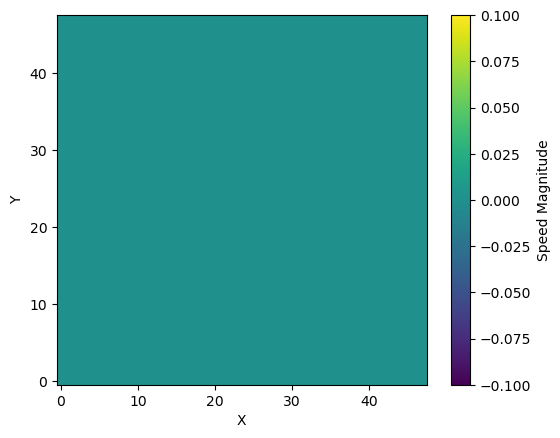

In [136]:
import matplotlib.pyplot as plt

speed_magnitude = np.zeros((nbFrames, rho.shape[1], rho.shape[2])) 
for t in range(nbFrames-1):
    for x in range(rho.shape[1]):
        for y in range(rho.shape[2]):
            speed_magnitude[t, x, y] = np.linalg.norm(velocity_field[t, x, y, :])

plt.imshow(speed_magnitude[35, :, :], cmap='viridis', origin='lower')
plt.colorbar(label='Speed Magnitude')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


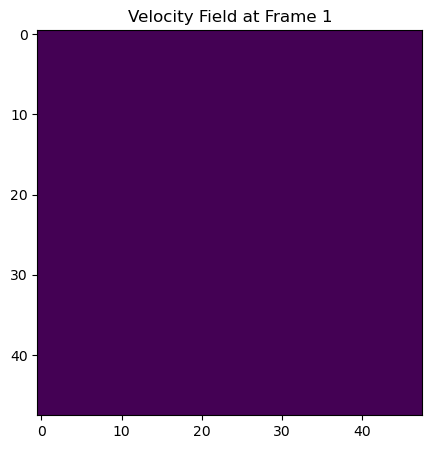

In [60]:
frame_index = 1
selected_frame = velocity_field[frame_index]

# Extract the x and y components of the velocity vectors
x_component = selected_frame[:, :, 0]
y_component = selected_frame[:, :, 1]

# Create a grid of coordinates for the quiver plot
image = np.sqrt(np.square(x_component)+np.square(y_component))

# Plot the vector field using quiver plot
plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.title('Velocity Field at Frame {}'.format(frame_index))
plt.show()

In [47]:
for i in range(len(image)):
    for j in range(len(image[0])):
        if image[i,j] !=0:
            print(image[i,j])

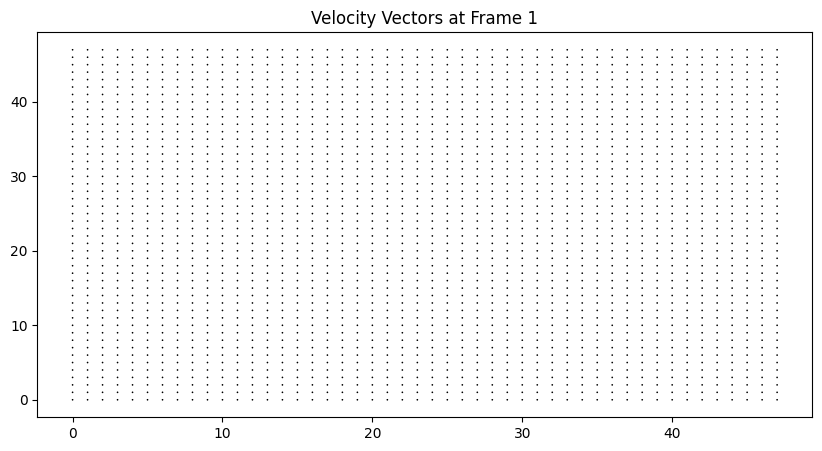

In [30]:
frame_index =1
selected_frame = velocity_field[frame_index]

# Extract the x and y components of the velocity vectors
x_component = selected_frame[:, :, 0]
y_component = selected_frame[:, :, 1]

# Create a grid of coordinates for the quiver plot
x, y = np.meshgrid(np.arange(selected_frame.shape[1]), np.arange(selected_frame.shape[0]))

# Plot the velocity vectors using quiver plot
plt.figure(figsize=(10, 5))
plt.quiver(x, y, x_component, y_component, angles='xy', scale_units='xy', scale=1)
plt.title('Velocity Vectors at Frame {}'.format(frame_index))
plt.show()

(48, 48, 3)
(48, 48)


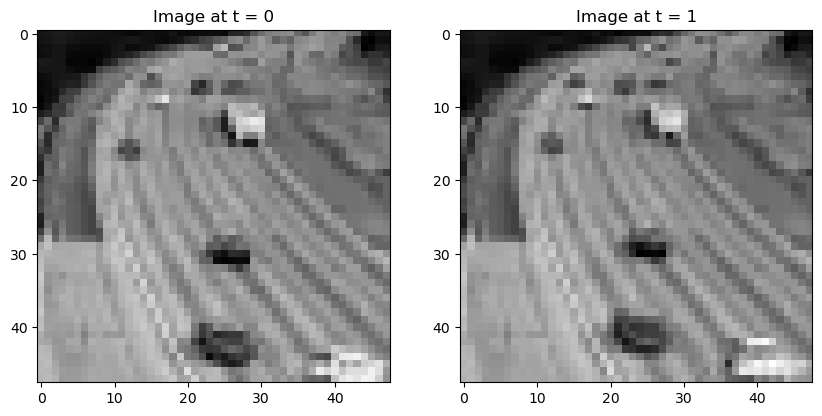

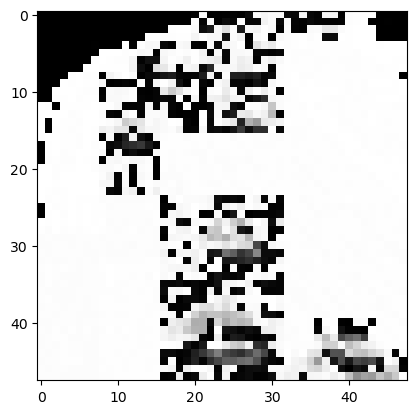

48
48


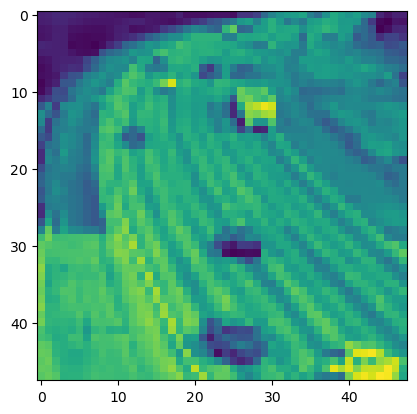

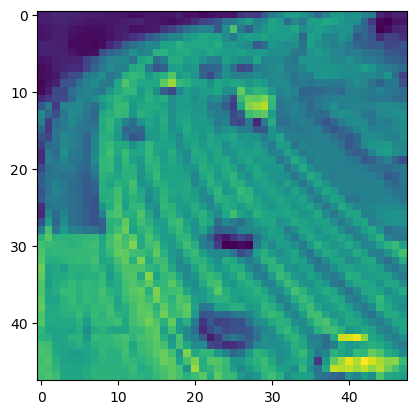

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2

# Read the images
image1 = cv2.imread('image1.png')
image2 = cv2.imread('image2.png')
print(image1.shape)
# Display the images
plt.figure(figsize=(10, 5))
image1 = cv2. cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
print(image1.shape)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image at t = 0')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image at t = 1')

plt.show()

plt.imshow(cv2.cvtColor(image2-image1, cv2.COLOR_BGR2RGB))
plt.show()
print(len(image1))
print(len(image1[0]))
video_image = np.zeros((len(image1), len(image1),2))
video_image[:,:,0] = image1
video_image[:,:,1] = image2

plt.imshow(video_image[:,:,0])
plt.show()

plt.imshow(video_image[:,:,1])
plt.show()

In [32]:
import numpy as np

# ... (le reste de votre code)

def flow_algorithm_2(rho, rho_twice, N, omega_fr, omega_tilde, nbFrames):
    velocity_field = np.zeros((nbFrames, rho.shape[0], rho.shape[1], 2))  # Initialize velocity field
    f_s = np.zeros((q, rho.shape[0], rho.shape[1], nbFrames))  # Initialize distribution function
    rho_n = np.zeros((rho.shape[0], rho.shape[1], nbFrames))
    
    for t in range(nbFrames-1):
        for x in range(1, rho.shape[0]-1):
            for y in range(rho.shape[1]):
                for i in range(q):
                    f_s[i, x, y, t] = omega[i] * rho[x, y, t]  # Initialize probabilities

        for n in range(N):
            for x in range(rho.shape[0]):
                for y in range(rho.shape[1]): 
                    for i in range(q):
                        rho_xy_t = rho[x, y, t]
                        v_n_xy_t = velocity_field[t, x, y]
                        f_eq = omega[i] * rho_xy_t * (1 + 3 * np.dot(epsilon[i], v_n_xy_t + (9/2.0) * np.dot(epsilon[i], v_n_xy_t)**2 - 1.5 * np.linalg.norm(v_n_xy_t)**2))  # Calculate equilibrium distribution
                        f_c = f_s[i, x, y, t] - omega_fr * (f_s[i, x, y, t] - f_eq)  # Collision

                        new_x = x + epsilon[i][0]
                        new_y = y + epsilon[i][1]
                
                        if 0 <= new_x < rho.shape[0] and 0 <= new_y < rho.shape[1]:
                            f_s[i, new_x, new_y, t+1] = f_c  # Stream

        for x in range(rho.shape[0]):
            for y in range(rho.shape[1]): 
                rho_n[x, y, t+1] = 0
                for i in range(q):                              
                    rho_n[x, y, t+1] += f_s[i, x, y, t+1] 

        for x in range(rho.shape[0]):
            for y in range(rho.shape[1]): 
                for i in range(q):
                    new_x = x + epsilon[i][0]
                    new_y = y + epsilon[i][1]
                
                    if 0 <= new_x < rho.shape[0] and 0 <= new_y < rho.shape[1]:
                        f_s[i, x, y, t] = f_s[i, x, y, t] - omega_tilde * (rho_n[new_x, new_y, t+1] - rho[new_x, new_y, t])  # Correction
                        velocity_field[t, x, y] = calculate_velocity(f_s[:, x, y, t], rho[x, y, t])  # Calculate velocity field

    return velocity_field

def calculate_algorithm_2(rho, N, omega_fr, omega_tilde, nbFrames):
    rho_twice = np.concatenate((rho, rho), axis=-1)  # Concatenate the images along the time axis
    velocity_field_original = flow_algorithm(rho, N, omega_fr, omega_tilde, nbFrames)
    velocity_field_twice = flow_algorithm_2(rho, rho_twice, N, omega_fr, omega_tilde, nbFrames)

    return velocity_field_original - velocity_field_twice

# Example usage
rho = video_image  # Example spatio-temporal image
N = 5  # Number of correction cycles
omega_fr = 0.1  # Relaxation frequency
omega_tilde = 0.1  # Correction rate
nbFrames = 2  # Number of frames in the video (put 1 if you have 2 frames)

velocity_field_algorithm_2 = calculate_algorithm_2(rho, N, omega_fr, omega_tilde, nbFrames)

print(velocity_field_algorithm_2.shape)
print(velocity_field_algorithm_2)


C:\Users\dell\AppData\Local\Temp\ipykernel_11724\4047978747.py:59: RuntimeWarning: invalid value encountered in divide
  return velocity / rho_xy
C:\Users\dell\AppData\Local\Temp\ipykernel_11724\4047978747.py:59: RuntimeWarning: divide by zero encountered in divide
  return velocity / rho_xy
C:\Users\dell\AppData\Local\Temp\ipykernel_11724\4047978747.py:24: RuntimeWarning: invalid value encountered in add
  f_eq = omega[i] * rho_xy_t * (1 + 3*np.dot(epsilon[i], v_n_xy_t + (9/2.0)*np.dot(epsilon[i], v_n_xy_t)**2-1.5*np.linalg.norm(v_n_xy_t)**2))  # Calculate equilibrium distribution
C:\Users\dell\AppData\Local\Temp\ipykernel_11724\4047978747.py:24: RuntimeWarning: invalid value encountered in subtract
  f_eq = omega[i] * rho_xy_t * (1 + 3*np.dot(epsilon[i], v_n_xy_t + (9/2.0)*np.dot(epsilon[i], v_n_xy_t)**2-1.5*np.linalg.norm(v_n_xy_t)**2))  # Calculate equilibrium distribution


(2, 48, 48, 2)
[[[[ 2.23786897e-02  6.98149219e-02]
   [ 2.51971828e-02 -4.66505010e-02]
   [ 7.73727959e-03  1.30611196e-02]
   ...
   [            nan             nan]
   [            nan             nan]
   [            nan             nan]]

  [[-1.92260600e-01  7.27014267e-02]
   [-2.71050974e-01 -6.02570433e-02]
   [-1.94631684e-01  1.41227927e-02]
   ...
   [            nan             nan]
   [            nan             nan]
   [            nan             nan]]

  [[-3.39733654e-02 -1.61373789e-03]
   [-3.45060862e-02 -2.89823331e-02]
   [-7.82101408e-03  7.26703110e-03]
   ...
   [            nan             nan]
   [            nan             nan]
   [            nan             nan]]

  ...

  [[ 8.63304014e-03 -2.21638051e-04]
   [ 1.14016832e-02 -3.83720015e-02]
   [ 5.90702654e-03  2.64173601e-03]
   ...
   [-1.75535575e-02 -2.45172575e-02]
   [-2.34763881e-02  4.58191557e-02]
   [-1.25300413e-02  2.67025236e-02]]

  [[ 1.44415402e-01  5.33544665e-02]
   [ 1.96629223e-